<a href="https://colab.research.google.com/github/MarriRohan/Reinforcement-Learning-2025/blob/main/ASS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement a Python program to calculate and visualize the value function for a deterministic 5x5 GridWorld with a fixed policy, a goal at (4,4) (+10 reward), a pit at (2,2) (-10 reward), and -1 reward for other movements, using a discount factor of 0.9. Analyze the effect of changing the discount factor.

## Define the gridworld environment

### Subtask:
Represent the 5x5 grid, including the start state, goal state, pit state, and rewards for each state transition.


**Reasoning**:
Initialize a 5x5 grid with default rewards, then set specific rewards for the goal and pit states, and define the grid size.



In [1]:
grid_size = 5
grid = [[-1 for _ in range(grid_size)] for _ in range(grid_size)]

# Set the reward for the goal state
grid[4][4] = 10

# Set the reward for the pit state
grid[2][2] = -10

print("Grid representation with rewards:")
for row in grid:
    print(row)

Grid representation with rewards:
[-1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1]
[-1, -1, -10, -1, -1]
[-1, -1, -1, -1, -1]
[-1, -1, -1, -1, 10]


## Define the fixed policy

### Subtask:
Implement the policy of always attempting to move 'Right' if possible, otherwise 'Down'.


**Reasoning**:
Implement the described policy as a Python function that takes the current row and column and returns the next state according to the policy.



In [2]:
def deterministic_policy(row, col):
    """
    Defines a deterministic policy for the GridWorld.
    Always attempts to move Right, if not possible, moves Down.

    Args:
        row: The current row.
        col: The current column.
        grid_size: The size of the grid (assumed to be a global variable).

    Returns:
        A tuple (next_row, next_col) representing the next state.
    """
    if col < grid_size - 1:
        # Try to move Right
        return row, col + 1
    else:
        # If moving Right is not possible, move Down
        return row + 1, col

print("Deterministic policy function defined.")

Deterministic policy function defined.


## Implement the bellman expectation equation

### Subtask:
Write a function to calculate the value function V(s) for all states using the given policy and discount factor.


**Reasoning**:
Define the function to calculate the value function using iterative updates based on the Bellman expectation equation, the provided grid, policy, and discount factor.



In [3]:
def calculate_value_function(grid, policy, discount_factor, iterations=1000, tolerance=1e-6):
    """
    Calculates the value function V(s) for all states using iterative updates.

    Args:
        grid: The grid representing the environment and rewards.
        policy: The deterministic policy function.
        discount_factor: The discount factor (gamma).
        iterations: The maximum number of iterations.
        tolerance: The convergence tolerance.

    Returns:
        A 2D list representing the value function for each state.
    """
    grid_size = len(grid)
    value_function = [[0.0 for _ in range(grid_size)] for _ in range(grid_size)]

    for _ in range(iterations):
        new_value_function = [[0.0 for _ in range(grid_size)] for _ in range(grid_size)]
        max_delta = 0

        for r in range(grid_size):
            for c in range(grid_size):
                if (r, c) == (4, 4) or (r, c) == (2, 2):
                    # Goal and Pit states are terminal with their respective rewards
                    new_value_function[r][c] = grid[r][c]
                else:
                    # Determine the next state using the policy
                    next_r, next_c = policy(r, c)

                    # Ensure the next state is within grid bounds (should be handled by policy but good practice)
                    next_r = min(max(0, next_r), grid_size - 1)
                    next_c = min(max(0, next_c), grid_size - 1)

                    # Calculate the reward for the current state (based on the grid)
                    reward = grid[r][c] # Reward is associated with entering the state

                    # Bellman expectation equation update
                    new_value_function[r][c] = reward + discount_factor * value_function[next_r][next_c]

                max_delta = max(max_delta, abs(new_value_function[r][c] - value_function[r][c]))

        value_function = new_value_function

        # Check for convergence
        if max_delta < tolerance:
            print(f"Converged after {_ + 1} iterations.")
            break

    return value_function

print("Value function calculation function defined.")


Value function calculation function defined.


## Compute and display the value function

### Subtask:
Run the value function calculation and display the computed V(s) for all states, perhaps in a grid format.


**Reasoning**:
Implement the remaining steps to calculate and display the value function for the GridWorld.



In [4]:
# Set the discount factor gamma
gamma = 0.9

# Calculate the value function
value_function_0_9 = calculate_value_function(grid, deterministic_policy, gamma)

# Display the computed V(s) in a grid format
print("\nValue function V(s) for gamma = 0.9:")
for row in value_function_0_9:
    print([f"{val:.2f}" for val in row])

Converged after 10 iterations.

Value function V(s) for gamma = 0.9:
['-1.39', '-0.43', '0.63', '1.81', '3.12']
['-0.43', '0.63', '1.81', '3.12', '4.58']
['-10.00', '-10.00', '-10.00', '4.58', '6.20']
['1.81', '3.12', '4.58', '6.20', '8.00']
['3.12', '4.58', '6.20', '8.00', '10.00']


## Visualize the value function

### Subtask:
Create a visualization of the value function on the grid, potentially using a heatmap.


**Reasoning**:
Create a heatmap visualization of the value function.



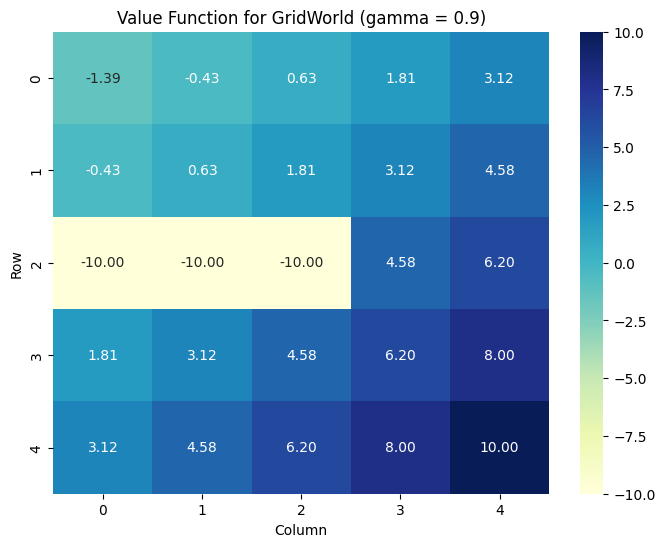

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(value_function_0_9, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Value Function for GridWorld (gamma = 0.9)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

## Analyze the effect of gamma

### Subtask:
Discuss how changing the discount factor γ affects the computed value function.


**Reasoning**:
Explain the effect of changing the discount factor based on the Bellman equation and the previously computed value function, and optionally compute the value function for a different gamma value to support the analysis.



Discussion on the effect of changing the discount factor gamma:

1. Role of gamma in the Bellman Expectation Equation:
The Bellman expectation equation is V(s) = R(s) + γ * Σ P(s'|s,a) * V(s'). In our deterministic case, this simplifies to V(s) = R(s) + γ * V(s'), where s' is the next state determined by the policy.
Gamma (γ) is the discount factor, a value between 0 and 1. It determines the present value of future rewards.

2. Impact of Higher Gamma (closer to 1):
A higher gamma value gives more weight to future rewards. This means the agent considers rewards that are further in the future as more valuable. In the context of the value function, states that are many steps away from high rewards (like the goal) or low rewards (like the pit) will have their values influenced more significantly by those distant rewards.
With gamma closer to 1, the value function will tend to propagate the influence of terminal states (goal and pit) further out into the grid. States far from the goal will 

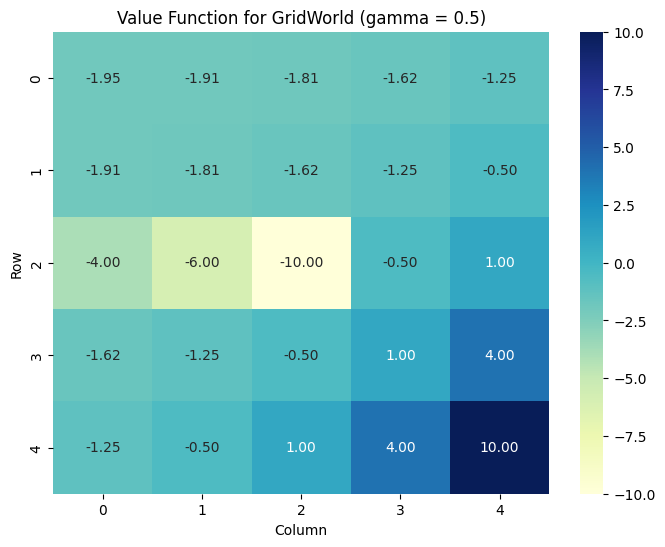

In [6]:
print("Discussion on the effect of changing the discount factor gamma:")
print("\n1. Role of gamma in the Bellman Expectation Equation:")
print("The Bellman expectation equation is V(s) = R(s) + γ * Σ P(s'|s,a) * V(s'). In our deterministic case, this simplifies to V(s) = R(s) + γ * V(s'), where s' is the next state determined by the policy.")
print("Gamma (γ) is the discount factor, a value between 0 and 1. It determines the present value of future rewards.")

print("\n2. Impact of Higher Gamma (closer to 1):")
print("A higher gamma value gives more weight to future rewards. This means the agent considers rewards that are further in the future as more valuable. In the context of the value function, states that are many steps away from high rewards (like the goal) or low rewards (like the pit) will have their values influenced more significantly by those distant rewards.")
print("With gamma closer to 1, the value function will tend to propagate the influence of terminal states (goal and pit) further out into the grid. States far from the goal will have higher values (less negative or more positive) because the positive reward at the goal is discounted less over the many steps it takes to reach it. Similarly, states far from the pit will have lower values (more negative or less positive) because the negative reward at the pit is also discounted less.")

print("\n3. Impact of Lower Gamma (closer to 0):")
print("A lower gamma value gives more weight to immediate rewards. Future rewards are heavily discounted, meaning rewards that are many steps away have very little impact on the value of the current state.")
print("With gamma closer to 0, the value function will be dominated by the immediate reward R(s). The influence of terminal states (goal and pit) will be localized to states that are only a few steps away. States far from the goal or pit will have values primarily reflecting their immediate reward (-1 in most cases), and the distant goal/pit rewards will have minimal impact due to the heavy discounting.")

print("\n4. Expected Changes based on gamma = 0.9 analysis:")
print("For gamma = 0.9, we observed that the values in the grid generally increased as we got closer to the goal (4,4) and decreased as we got closer to the pit (2,2). The influence of the goal and pit was visible across a significant portion of the grid.")
print("If gamma were lower (e.g., 0.5): We would expect the values in states far from the goal and pit to be closer to the immediate reward (-1). The gradients in the value function (changes in value between adjacent states) would be steeper near the goal and pit, and flatter further away. The influence of the terminal states would be more localized.")
print("If gamma were higher (e.g., 0.99): We would expect the values in states far from the goal and pit to be more strongly influenced by these terminal states. The values of states far from the goal would be higher than with gamma=0.9, and the values of states far from the pit would be lower than with gamma=0.9. The influence would spread out more evenly across the grid.")

# Optional: Compute and display value function for a different gamma
gamma_low = 0.5
value_function_0_5 = calculate_value_function(grid, deterministic_policy, gamma_low)

print(f"\nValue function V(s) for gamma = {gamma_low}:")
for row in value_function_0_5:
    print([f"{val:.2f}" for val in row])

# Optional: Visualize the value function for the different gamma
plt.figure(figsize=(8, 6))
sns.heatmap(value_function_0_5, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(f"Value Function for GridWorld (gamma = {gamma_low})")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The 5x5 GridWorld environment was successfully defined with a goal state at (4,4) having a reward of +10, a pit state at (2,2) with a reward of -10, and all other states having a movement reward of -1.
*   A deterministic policy was implemented where the agent always attempts to move Right; if unable, it moves Down.
*   The Bellman expectation equation was implemented to iteratively calculate the value function for each state under the defined policy and a given discount factor. The iterative calculation converged after 10 iterations for $\gamma = 0.9$.
*   For a discount factor $\gamma = 0.9$, the calculated value function showed that states closer to the goal generally have higher values, and states closer to the pit have lower values. The influence of the terminal states (goal and pit) is evident across the grid.
*   A heatmap visualization effectively displayed the value function for $\gamma = 0.9$, providing a clear visual representation of the state values.
*   Analysis of the effect of changing the discount factor indicated that a higher $\gamma$ gives more weight to future rewards, spreading the influence of terminal states further across the grid. A lower $\gamma$ emphasizes immediate rewards, localizing the influence of terminal states closer to their locations, as demonstrated by the calculation and visualization for $\gamma = 0.5$.

### Insights or Next Steps

*   The choice of discount factor significantly impacts how far-sighted the agent is in evaluating states. A higher discount factor leads to a value function that reflects the long-term consequences of being in a state, while a lower discount factor focuses on immediate rewards.
*   Future work could involve implementing Value Iteration or Policy Iteration algorithms to find the optimal value function and corresponding optimal policy for this GridWorld.
